In [12]:
import numpy as np
import pandas as pd
import os
import datetime
from matplotlib import pyplot as plt

In [13]:
def read_txt(filename):
    save_ls = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.split(',')
            for val in line:
                save_ls.append(val)
    return save_ls

# read in sensor data
l1 = read_txt('../collection1/CS109a_light.txt')
l2 = read_txt('../collection2/CS109a_light.txt')
l3 = read_txt('../collection3/CS109a_light.txt')
l4 = read_txt('../collection4/CS109a_light.txt')
l5 = read_txt('../collection5/CS109a_light.txt')
l6 = read_txt('../collection6/CS109a_light.txt')
l7 = read_txt('../collection7/CS109a_light.txt')
l8 = read_txt('../collection8/CS109a_light.txt')
l9 = read_txt('../collection9/CS109a_light.txt')

In [14]:
# generate start times (every 30 minutes) from initial start dates
oct23 = datetime.datetime(2019, 10, 23, hour=8, minute=16)
oct29 = datetime.datetime(2019, 10, 29, hour=22, minute=42)
nov3 = datetime.datetime(2019, 11, 3, hour=9, minute=30)
nov6 = datetime.datetime(2019, 11, 6, hour=21, minute=13)
nov11 = datetime.datetime(2019, 11, 11, hour=12, minute=50)
nov16 = datetime.datetime(2019, 11, 16, hour=9, minute=0) # temp, press, hum every 15 min
nov21 = datetime.datetime(2019, 11, 21, hour=8, minute=53)
nov26 = datetime.datetime(2019, 11, 26, hour=13, minute=7)
dec2 = datetime.datetime(2019, 12, 2, hour=8, minute=35)

def compute_time_int(start_dt, light, minute=5):
    dates = [start_dt]
    for i in range(len(light)-1): 
        dates.append(dates[i] + datetime.timedelta(minutes=minute))
    df = pd.DataFrame({'date': dates,'light': light})
    df.drop(df.tail(1).index,inplace=True)
    return df

df0 = compute_time_int(oct23, l1, minute=30)
df1 = compute_time_int(oct29, l2)
df2 = compute_time_int(nov3, l3)
df3 = compute_time_int(nov6, l4)
df4 = compute_time_int(nov11, l5)
df5 = compute_time_int(nov16, l6)
df6 = compute_time_int(nov21, l7)
df7 = compute_time_int(nov26, l8)
df8 = compute_time_int(dec2, l9)

In [15]:
def convert_to_float(dfs):
    for df in dfs:
        df.light = [float(i) for i in df.light]

def fill_in_dates(start_dt, end_dt):
    in_between = []
    cur_dt = start_dt
    in_between.append(cur_dt)
    while cur_dt <= end_dt:
        cur_dt += datetime.timedelta(minutes=5)
        in_between.append(cur_dt)
    return in_between

def create_large_df(dfs, ls=None, fill_in=False):
    if fill_in:
        b0 = fill_in_dates(max(df0.date), min(df1.date))
        b1 = fill_in_dates(max(df1.date), min(df2.date))
        b2 = fill_in_dates(max(df2.date), min(df3.date))
        b3 = fill_in_dates(max(df3.date), min(df4.date))

    #     df01 = pd.DataFrame({'date': b1, 'light': float(l1[-2])*np.ones(len(b1))})
        df11 = pd.DataFrame({'date': b1, 'light': float(l2[-2])*np.ones(len(b1))})
        df21 = pd.DataFrame({'date': b2, 'light': float(l3[-2])*np.ones(len(b2))})
        df31 = pd.DataFrame({'date': b3, 'light': float(l4[-2])*np.ones(len(b3))})

        light = pd.concat([df0,df1,df11,df2,df21,df3,df31,df4], axis=0)
    else:
        
        light = pd.concat(dfs, axis=0)
    return light

def assign_numerical_date_vals(df):
    df2 = df.copy()
    month = []
    day = []
    hour = []
    minute = []
    weekday = []
    for i,dt in enumerate(df2['date']):
        month.append(dt.month)
        day.append(dt.day)
        hour.append(dt.hour)
        minute.append(dt.minute)
        weekday.append(dt.weekday())

    df2['month'] = month
    df2['day'] = day
    df2['hour'] = hour
    df2['minute'] = minute
    df2['weekday'] = weekday
    return df2

def get_day_labels(df):
    days = df['day']
    unique_days =list(np.unique(days))
#     print(unique_days)
    indexes = np.unique(days, return_index=True)[1]
    dates_in_order = [days.values[index] for index in sorted(indexes)]
    return dates_in_order

def calendar_plot(df, dates_in_order, feature):
    fig, ax = plt.subplots(6,6, figsize=(18,15), sharey=True)
    ax = ax.flatten()

    for i,d in enumerate(dates_in_order):
        temp = df[df['day'] == d]
        ax[i].scatter(temp['hour'], temp[feature])
        ax[i].set_title("Day {}".format(d))
    plt.suptitle(feature)
    plt.xlabel("Hour")
    plt.ylabel(feature)
    plt.show()


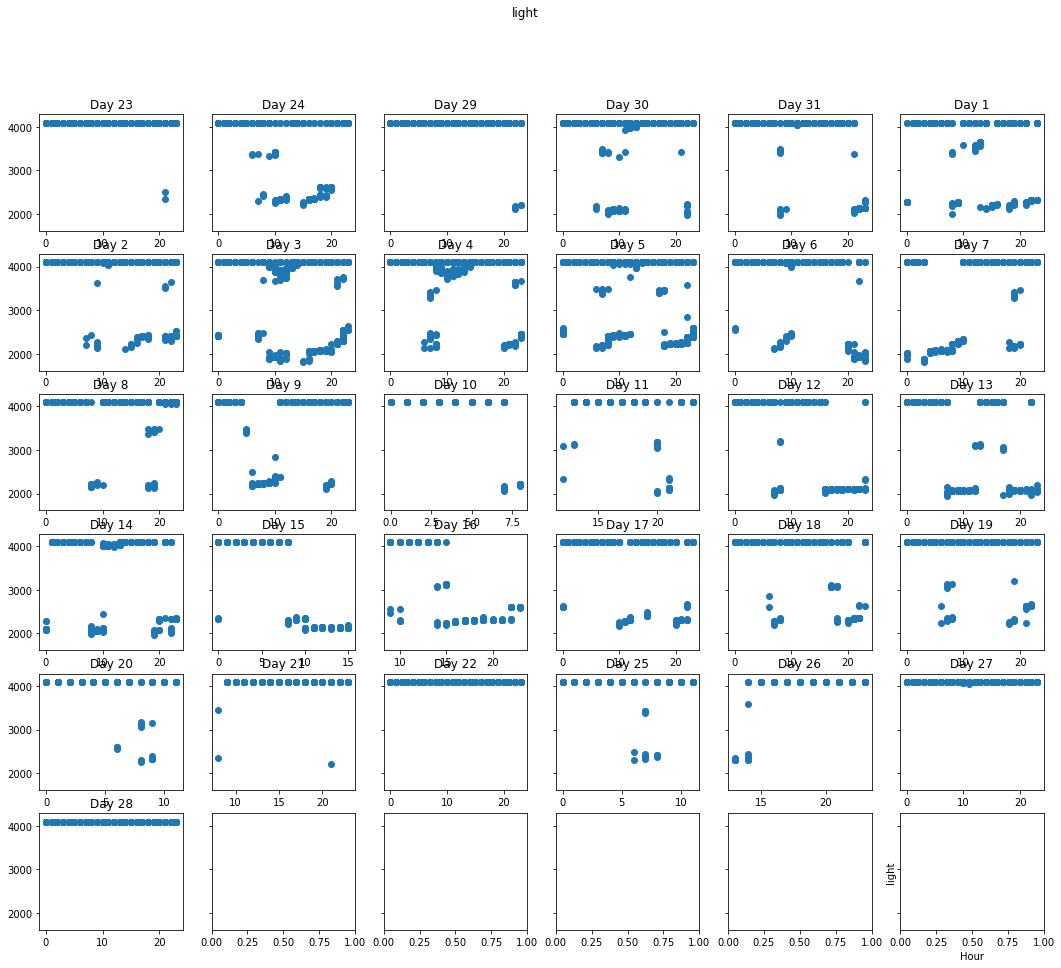

In [16]:
dfs = [df0,df1,df2,df3,df4, df5, df6, df7, df8]   

# convert light values to floats
convert_to_float(dfs)

# create large df from all collection samples
dfs_to_concat = [df0, df1, df2, df3, df4, df5, df6, df7,df8]
# ls = [l1, l2, l3, l4]
light = create_large_df(dfs_to_concat)  

# plot based on calendar day
light2 = assign_numerical_date_vals(light)
dates_in_order = get_day_labels(light2)
calendar_plot(light2, dates_in_order, 'light')

In [17]:
def ave_light(x):
    x['avg_hrly_light'] = np.mean(x['light'])
    return x

light3 = light2.groupby(['month','day', 'hour']).apply(ave_light)
light4 = light3.drop(columns=['date', 'minute', 'light'])
light5 = light4.drop_duplicates(subset=["month","day", 'hour'])

In [11]:
light5.to_csv('light_df.csv')